In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('CarDetails.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.count()

name             4340
year             4340
selling_price    4340
km_driven        4340
fuel             4340
seller_type      4340
transmission     4340
owner            4340
dtype: int64

In [ ]:
df.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
dtype: bool

In [ ]:
df['year'].value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

In [ ]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [ ]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [ ]:
df['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [ ]:
data=pd.get_dummies(df,
                         columns = ["fuel","seller_type", "transmission"],
                         drop_first = True)

In [ ]:
x=data[['year',	'selling_price',	'km_driven',	'fuel_Diesel',	'fuel_Electric',	'fuel_LPG',	'fuel_Petrol',	'seller_type_Individual',	'seller_type_Trustmark Dealer',	'transmission_Manual']]

In [ ]:
y=data[['year',	'selling_price', 'km_driven']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =1/3 ,random_state=0)

In [ ]:
data

,name,year,selling_price,km_driven,owner,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti 800 AC,2007,60000,70000,First Owner,0,0,0,1,1,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,First Owner,0,0,0,1,1,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,First Owner,1,0,0,0,1,0,1
3,Datsun RediGO T Option,2017,250000,46000,First Owner,0,0,0,1,1,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Second Owner,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Second Owner,1,0,0,0,1,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Second Owner,1,0,0,0,1,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,Second Owner,0,0,0,1,1,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,First Owner,1,0,0,0,1,0,1


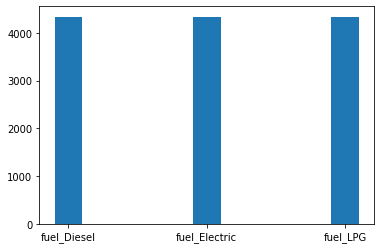

In [ ]:
dic = {'fuel_Diesel':data['fuel_Diesel'].count(), 'fuel_Electric':data['fuel_Electric'].count(),
       'fuel_LPG':data['fuel_LPG'].count()}
x = list(dic.keys())
height = list(dic.values())

plt.bar(x,height, width=0.2)
plt.show()


In [ ]:
y_train['year']


4048    2018
3774    2015
4276    2009
2450    2017
1052    2014
        ... 
1033    2013
3264    2012
1653    2016
2607    2015
2732    2013
Name: year, Length: 2893, dtype: int64

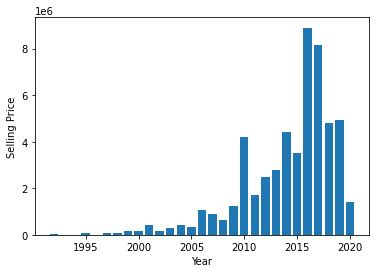

In [ ]:
plt.bar(y_train['year'],y_train['selling_price'],width=0.8)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
x_train


,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
4048,2018,320000,38900,0,0,0,1,1,0,1
3774,2015,155000,60000,0,0,0,1,1,0,1
4276,2009,233000,58000,0,0,0,1,1,0,1
2450,2017,500000,40000,0,0,0,1,1,0,0
1052,2014,250000,50000,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1033,2013,1300000,58500,1,0,0,0,0,0,0
3264,2012,120000,110000,1,0,0,0,1,0,1
1653,2016,270000,22000,0,0,0,1,1,0,1
2607,2015,600000,70000,1,0,0,0,1,0,1


In [ ]:
step2=RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)
step2.fit(x_train,y_train)
y_pred = step2.predict(x_test)
r2 = r2_score(y_test, y_pred)
print("Accuracy :",round(r2*100,2),'%')

Accuracy : 94.53 %


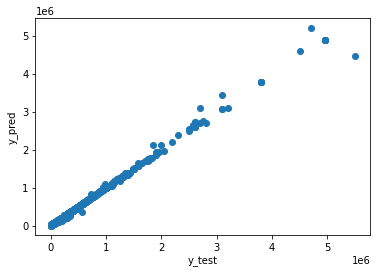

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()